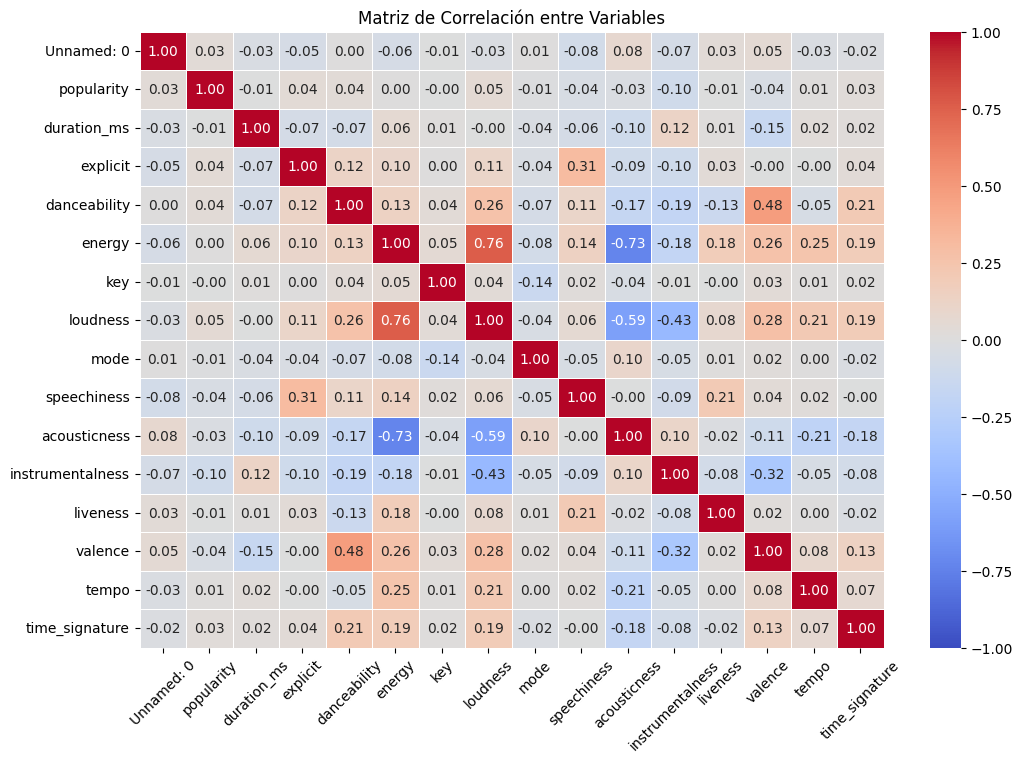

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("../data/raw/dataset.csv")

df = df.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre"])
# Crear la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Matriz de Correlación

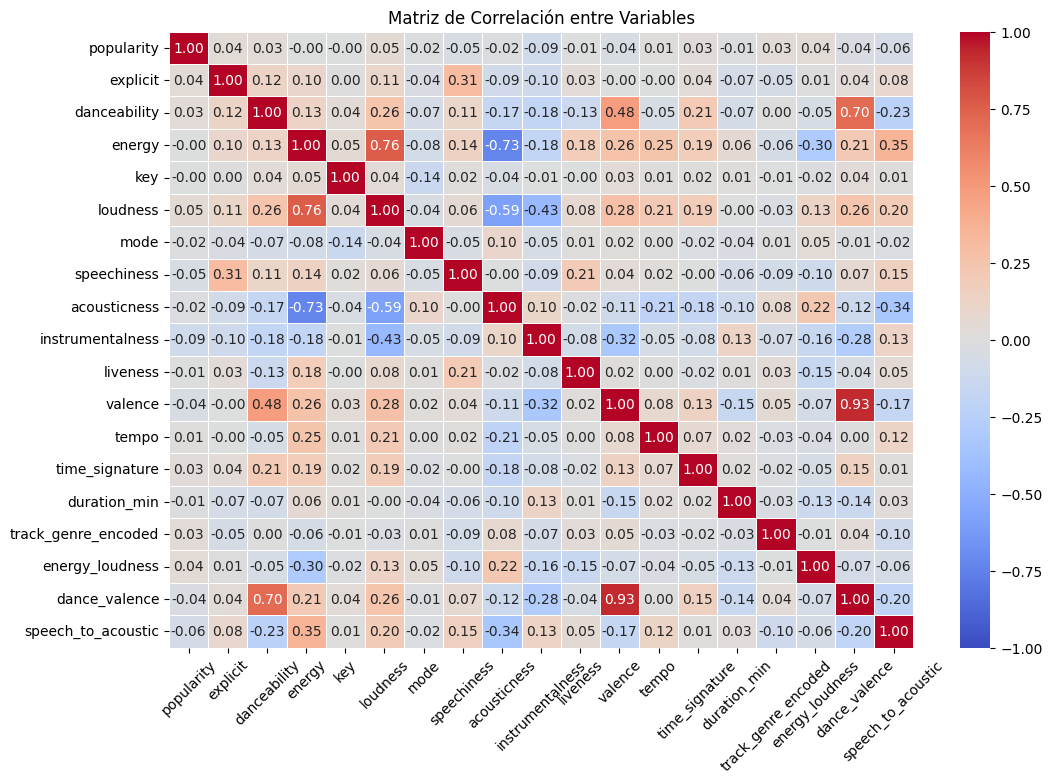

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("../data/processed/dataset_clean.csv")

# Crear la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Distribución de la Popularidad

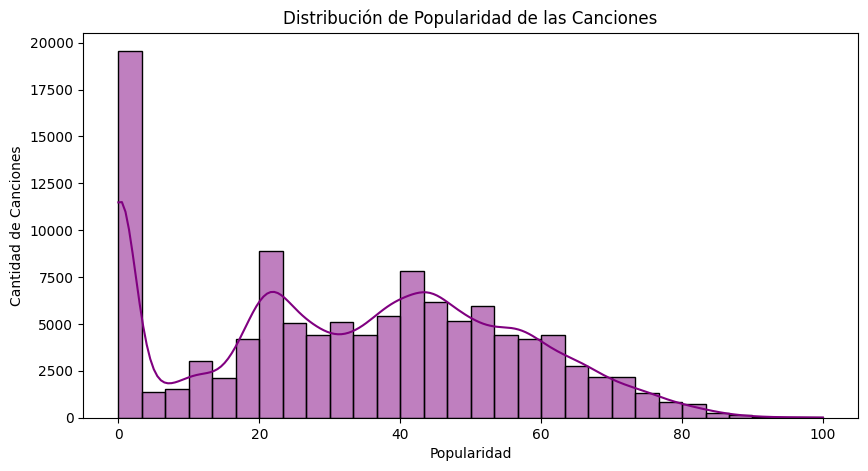

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df["popularity"], bins=30, kde=True, color="purple")
plt.title("Distribución de Popularidad de las Canciones")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de Canciones")
plt.show()


Visualización de Clusters (K-Means con PCA)

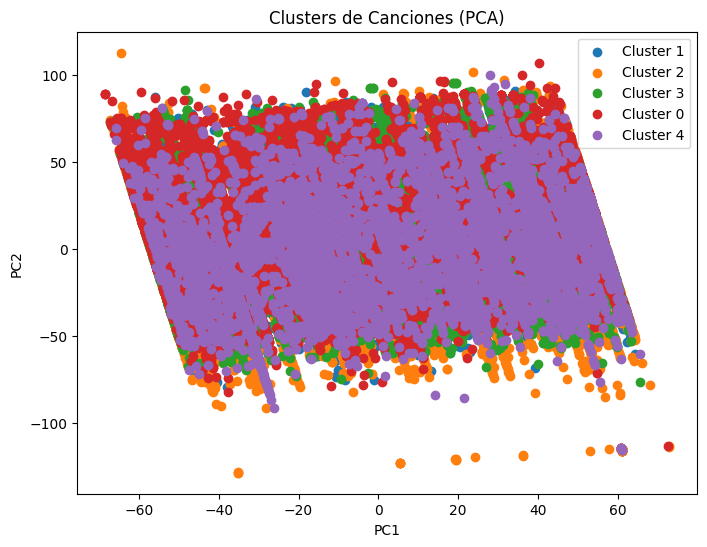

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

# Cargar datos y modelo
df = pd.read_csv("../data/processed/dataset_clustered.csv")
kmeans = joblib.load("../models/kmeans_model.pkl")

# Reducción de dimensionalidad con PCA
features = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_min', 'track_genre_encoded']
X = df[features]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["cluster"] = df["cluster"]

plt.figure(figsize=(8,6))
for c in df_plot["cluster"].unique():
    subset = df_plot[df_plot["cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}")
plt.title("Clusters de Canciones (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


Importancia de Características en Random Forest

/var/folders/_8/pg7m38n54nbc5mpbtzttwghh0000gn/T/ipykernel_15235/167307594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=[features[i] for i in indices], palette="viridis")


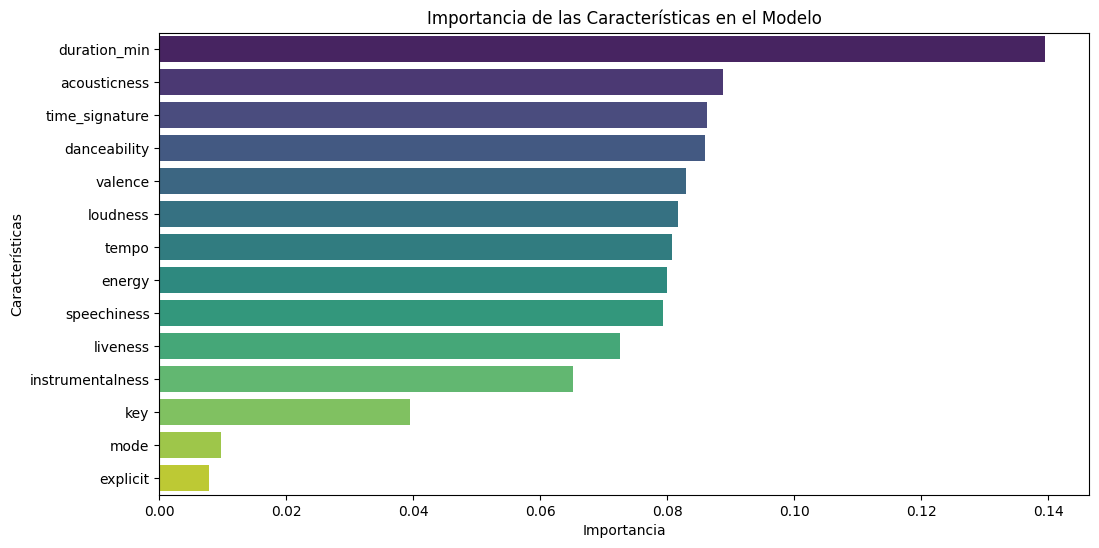

In [9]:
import joblib
import numpy as np

# Cargar el modelo entrenado
model = joblib.load("../models/best_model.pkl")

# Extraer la importancia de las características
feature_importances = model.feature_importances_
features = df.drop(columns=["popularity"]).columns  # Filtrar las variables

# Ordenar por importancia
indices = np.argsort(feature_importances)[::-1]

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances[indices], y=[features[i] for i in indices], palette="viridis")
plt.title("Importancia de las Características en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

Distribución de clusters

/var/folders/_8/pg7m38n54nbc5mpbtzttwghh0000gn/T/ipykernel_15235/1135366870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="coolwarm")


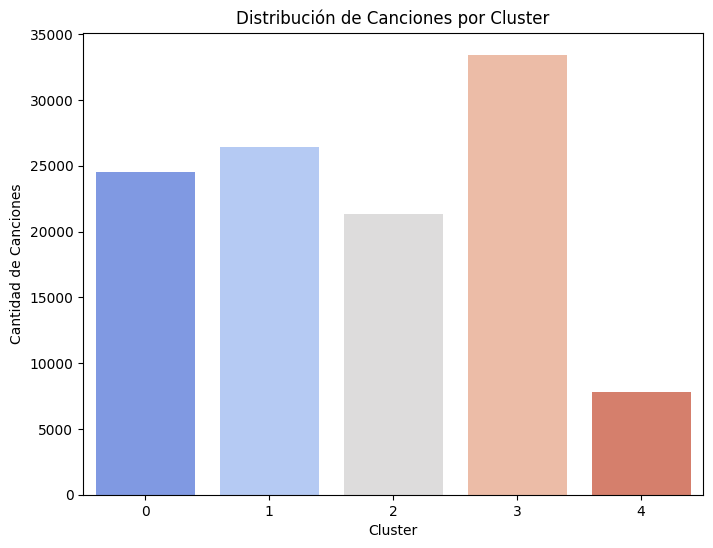

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar canciones por cluster
cluster_counts = df["cluster"].value_counts()

# Graficar
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de Canciones por Cluster")
plt.show()


Comparación entre modelos supervisados y no supervisados

/var/folders/_8/pg7m38n54nbc5mpbtzttwghh0000gn/T/ipykernel_15235/3958858834.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="RMSE", data=models_results, palette="viridis")


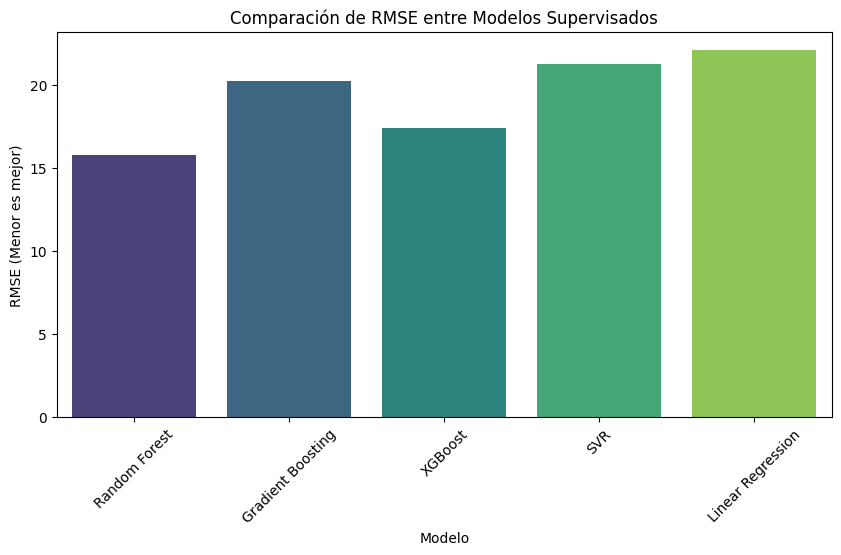

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear dataframe con métricas de modelos supervisados
models_results = pd.DataFrame({
    "Modelo": ["Random Forest", "Gradient Boosting", "XGBoost", "SVR", "Linear Regression"],
    "RMSE": [15.78, 20.25, 17.43, 21.27, 22.09]  # Valores que ya calculaste
})

# Gráfico de comparación de modelos supervisados
plt.figure(figsize=(10,5))
sns.barplot(x="Modelo", y="RMSE", data=models_results, palette="viridis")
plt.title("Comparación de RMSE entre Modelos Supervisados")
plt.ylabel("RMSE (Menor es mejor)")
plt.xticks(rotation=45)
plt.show()


Análisis de características dentro de cada cluster

/var/folders/_8/pg7m38n54nbc5mpbtzttwghh0000gn/T/ipykernel_15235/3018540684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y="danceability", data=df, palette="coolwarm")


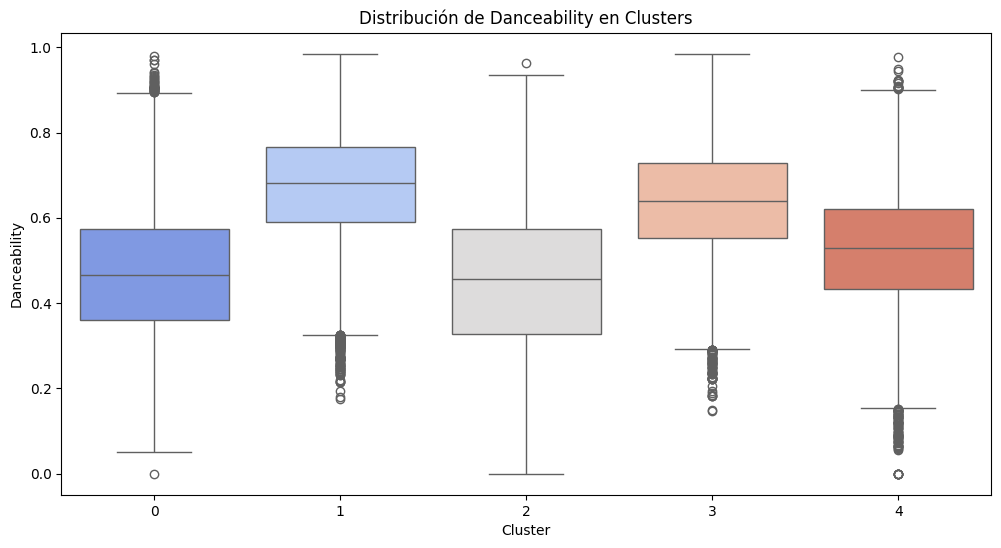

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x="cluster", y="danceability", data=df, palette="coolwarm")
plt.title("Distribución de Danceability en Clusters")
plt.xlabel("Cluster")
plt.ylabel("Danceability")
plt.show()